Import libraries

In [72]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

1. Aspect Ratio
\begin{align}
Aspect Ratio ={ Width \over Height}
\end{align}

In [119]:
img = cv.imread('../../images/lightning.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
contours,hierarchy = cv.findContours(img, 1, 2)
cnt = contours[0]
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
print("Aspect Ratio: ", aspect_ratio)

Aspect Ratio:  1.1130136986301369


2. Extent
\begin{align}
Extent ={ Object\ Area \over Bounding\ Rectangle\ Area}
\end{align}

In [120]:
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print("Extent: ",extent)

Extent:  0.25306111696522654


3. Solidity
\begin{align}
Solidity ={ Contour\ Area \over Convex\ Hull\ Area}
\end{align}

In [121]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print("Solidity: ",solidity)

Solidity:  0.7595875571299796


4. Equivalent Diameter
\begin{align}
Equivalent\ Diameter =\sqrt{4 \times Contour\ Area \over \pi}
\end{align}

In [122]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

174.86418811920095


5. Orientation

In [123]:
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
print(angle)

133.70970153808594


6. Mask and Pixel Points

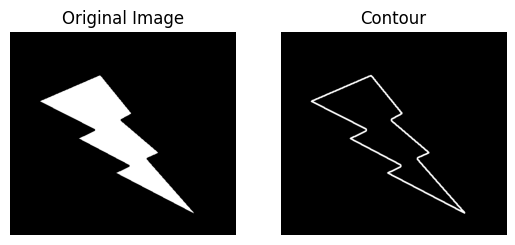

In [124]:
mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask, contours, -1,255, 2)

plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Contour'), plt.axis('off')
plt.show()

7. Maximum Value, Minimum Value and their locations

In [125]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(img,mask = mask)

8. Mean Color or Mean Intensity

In [126]:
mean_val = cv.mean(img,mask = mask)
print(mean_val)

(156.82398298324915, 0.0, 0.0, 0.0)


9. Extreme Points

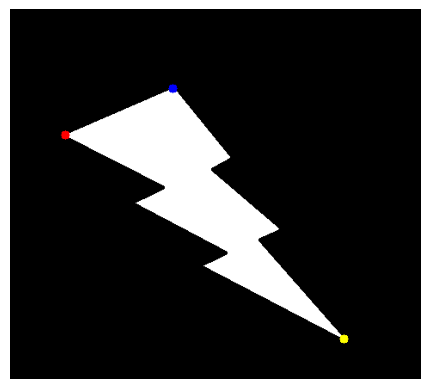

In [128]:

img_with_points = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# Draw circles at these points on the original image
cv.circle(img_with_points, leftmost, 5, (0, 0, 255), -1)  # Red color for leftmost
cv.circle(img_with_points, rightmost, 5, (0, 255, 0), -1)  # Green color for rightmost
cv.circle(img_with_points, topmost, 5, (255, 0, 0), -1)  # Blue color for topmost
cv.circle(img_with_points, bottommost, 5, (0, 255, 255), -1)  # Yellow color for bottommost

# Display the image with the points
plt.axis("off")
plt.imshow(cv.cvtColor(img_with_points, cv.COLOR_BGR2RGB))

plt.show()